# Phishing Website Detection Using Gradient Boosting Classifier 

Methodology:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

In [2]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:

In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [6]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

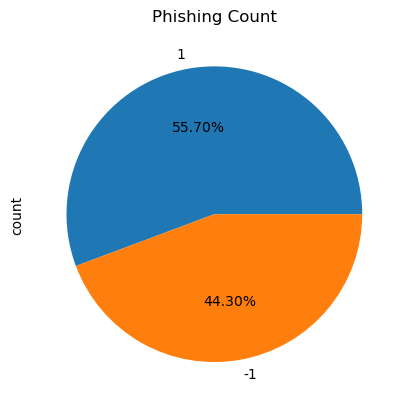

In [7]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:


In [8]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training:
Models:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

In [10]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [13]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [14]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [15]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [18]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [19]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



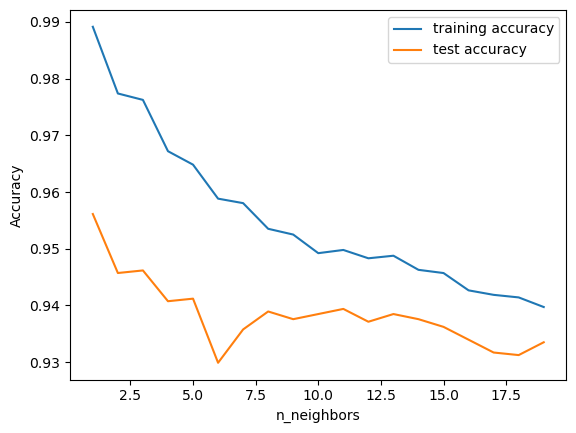

In [20]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [21]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}
svc = GridSearchCV(SVC(), param_grid)
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [23]:
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [24]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [25]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [26]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
nb=  GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [28]:
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [29]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [30]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [31]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=30)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [33]:
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.957

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.961

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.958

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.965


In [35]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



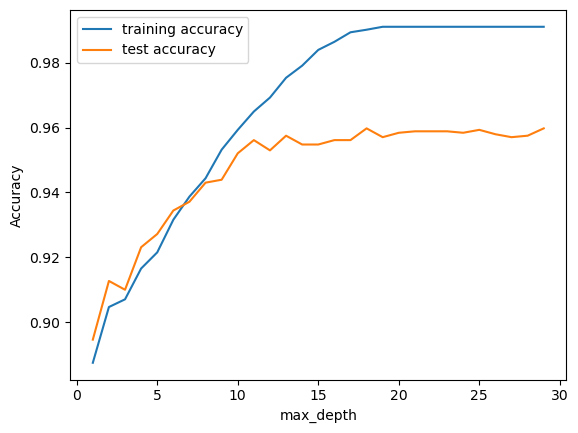

In [36]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [37]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [40]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.967

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.970

Random Forest : Recall on training Data: 0.992
Random Forest : Recall on test Data: 0.973

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.965


In [41]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



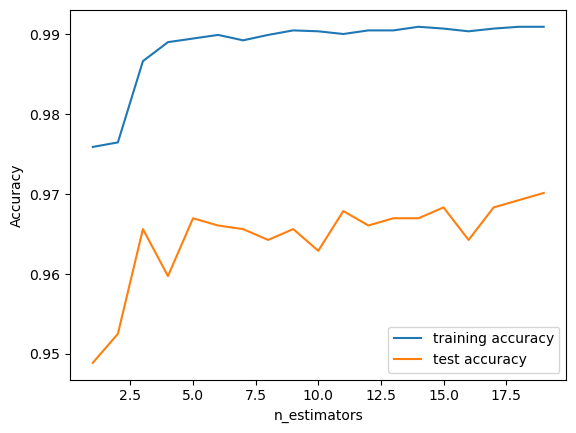

In [42]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [43]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [45]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [46]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [47]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



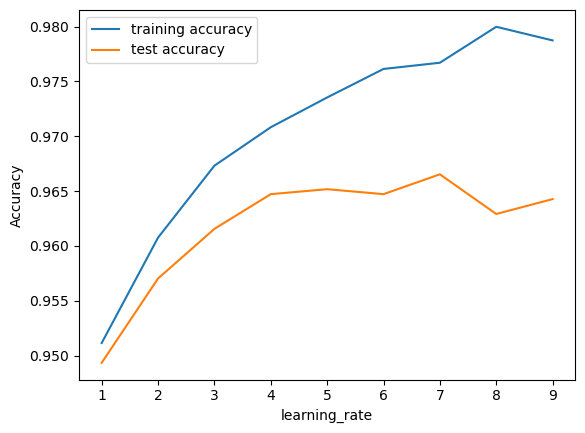

In [48]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [49]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

In [50]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate  = 0.1)
cat.fit(X_train,y_train)

0:	learn: 0.5487232	total: 159ms	remaining: 2m 38s
1:	learn: 0.4349357	total: 162ms	remaining: 1m 20s
2:	learn: 0.3609236	total: 164ms	remaining: 54.5s
3:	learn: 0.3050829	total: 167ms	remaining: 41.7s
4:	learn: 0.2766620	total: 171ms	remaining: 34.1s
5:	learn: 0.2475476	total: 175ms	remaining: 29s
6:	learn: 0.2286637	total: 179ms	remaining: 25.3s
7:	learn: 0.2138754	total: 182ms	remaining: 22.6s
8:	learn: 0.2013643	total: 186ms	remaining: 20.5s
9:	learn: 0.1896378	total: 190ms	remaining: 18.8s
10:	learn: 0.1819539	total: 193ms	remaining: 17.4s
11:	learn: 0.1767867	total: 197ms	remaining: 16.2s
12:	learn: 0.1727735	total: 201ms	remaining: 15.2s
13:	learn: 0.1682578	total: 204ms	remaining: 14.4s
14:	learn: 0.1641759	total: 208ms	remaining: 13.7s
15:	learn: 0.1614218	total: 212ms	remaining: 13s
16:	learn: 0.1558968	total: 216ms	remaining: 12.5s
17:	learn: 0.1535881	total: 219ms	remaining: 12s
18:	learn: 0.1514228	total: 223ms	remaining: 11.5s
19:	learn: 0.1482580	total: 227ms	remaining: 

164:	learn: 0.0552806	total: 768ms	remaining: 3.89s
165:	learn: 0.0550538	total: 772ms	remaining: 3.88s
166:	learn: 0.0548825	total: 776ms	remaining: 3.87s
167:	learn: 0.0547805	total: 779ms	remaining: 3.86s
168:	learn: 0.0546642	total: 783ms	remaining: 3.85s
169:	learn: 0.0543574	total: 787ms	remaining: 3.84s
170:	learn: 0.0542539	total: 791ms	remaining: 3.83s
171:	learn: 0.0540977	total: 794ms	remaining: 3.82s
172:	learn: 0.0539741	total: 798ms	remaining: 3.81s
173:	learn: 0.0537793	total: 802ms	remaining: 3.81s
174:	learn: 0.0535499	total: 806ms	remaining: 3.8s
175:	learn: 0.0533461	total: 809ms	remaining: 3.79s
176:	learn: 0.0531326	total: 813ms	remaining: 3.78s
177:	learn: 0.0530595	total: 817ms	remaining: 3.77s
178:	learn: 0.0529470	total: 820ms	remaining: 3.76s
179:	learn: 0.0527691	total: 824ms	remaining: 3.75s
180:	learn: 0.0526404	total: 828ms	remaining: 3.75s
181:	learn: 0.0525145	total: 831ms	remaining: 3.73s
182:	learn: 0.0524332	total: 835ms	remaining: 3.73s
183:	learn: 0

328:	learn: 0.0361574	total: 1.38s	remaining: 2.81s
329:	learn: 0.0361096	total: 1.38s	remaining: 2.8s
330:	learn: 0.0360786	total: 1.38s	remaining: 2.79s
331:	learn: 0.0360080	total: 1.39s	remaining: 2.79s
332:	learn: 0.0359705	total: 1.39s	remaining: 2.79s
333:	learn: 0.0359041	total: 1.39s	remaining: 2.78s
334:	learn: 0.0358134	total: 1.4s	remaining: 2.77s
335:	learn: 0.0357625	total: 1.4s	remaining: 2.77s
336:	learn: 0.0356498	total: 1.41s	remaining: 2.76s
337:	learn: 0.0355630	total: 1.41s	remaining: 2.76s
338:	learn: 0.0354664	total: 1.41s	remaining: 2.75s
339:	learn: 0.0354328	total: 1.42s	remaining: 2.75s
340:	learn: 0.0353908	total: 1.42s	remaining: 2.74s
341:	learn: 0.0353248	total: 1.42s	remaining: 2.74s
342:	learn: 0.0352669	total: 1.43s	remaining: 2.73s
343:	learn: 0.0352172	total: 1.43s	remaining: 2.73s
344:	learn: 0.0351687	total: 1.44s	remaining: 2.73s
345:	learn: 0.0351475	total: 1.44s	remaining: 2.72s
346:	learn: 0.0350233	total: 1.44s	remaining: 2.71s
347:	learn: 0.0

491:	learn: 0.0286538	total: 1.98s	remaining: 2.04s
492:	learn: 0.0286356	total: 1.98s	remaining: 2.04s
493:	learn: 0.0286061	total: 1.99s	remaining: 2.04s
494:	learn: 0.0285691	total: 1.99s	remaining: 2.03s
495:	learn: 0.0285441	total: 2s	remaining: 2.03s
496:	learn: 0.0285307	total: 2s	remaining: 2.02s
497:	learn: 0.0285271	total: 2s	remaining: 2.02s
498:	learn: 0.0285108	total: 2.01s	remaining: 2.01s
499:	learn: 0.0285107	total: 2.01s	remaining: 2.01s
500:	learn: 0.0284578	total: 2.01s	remaining: 2s
501:	learn: 0.0284303	total: 2.02s	remaining: 2s
502:	learn: 0.0283938	total: 2.02s	remaining: 2s
503:	learn: 0.0283746	total: 2.02s	remaining: 1.99s
504:	learn: 0.0283744	total: 2.03s	remaining: 1.99s
505:	learn: 0.0283597	total: 2.03s	remaining: 1.98s
506:	learn: 0.0283347	total: 2.04s	remaining: 1.98s
507:	learn: 0.0283150	total: 2.04s	remaining: 1.97s
508:	learn: 0.0282995	total: 2.04s	remaining: 1.97s
509:	learn: 0.0282783	total: 2.05s	remaining: 1.97s
510:	learn: 0.0282568	total: 2

661:	learn: 0.0256554	total: 2.6s	remaining: 1.33s
662:	learn: 0.0256554	total: 2.6s	remaining: 1.32s
663:	learn: 0.0256554	total: 2.6s	remaining: 1.32s
664:	learn: 0.0256554	total: 2.61s	remaining: 1.31s
665:	learn: 0.0256410	total: 2.61s	remaining: 1.31s
666:	learn: 0.0256409	total: 2.61s	remaining: 1.3s
667:	learn: 0.0256409	total: 2.62s	remaining: 1.3s
668:	learn: 0.0256405	total: 2.62s	remaining: 1.3s
669:	learn: 0.0256402	total: 2.62s	remaining: 1.29s
670:	learn: 0.0256341	total: 2.63s	remaining: 1.29s
671:	learn: 0.0256340	total: 2.63s	remaining: 1.28s
672:	learn: 0.0256340	total: 2.63s	remaining: 1.28s
673:	learn: 0.0256340	total: 2.64s	remaining: 1.27s
674:	learn: 0.0256341	total: 2.64s	remaining: 1.27s
675:	learn: 0.0256340	total: 2.64s	remaining: 1.27s
676:	learn: 0.0256212	total: 2.65s	remaining: 1.26s
677:	learn: 0.0256175	total: 2.65s	remaining: 1.26s
678:	learn: 0.0256062	total: 2.65s	remaining: 1.25s
679:	learn: 0.0255903	total: 2.66s	remaining: 1.25s
680:	learn: 0.0255

835:	learn: 0.0248538	total: 3.2s	remaining: 628ms
836:	learn: 0.0248538	total: 3.2s	remaining: 624ms
837:	learn: 0.0248538	total: 3.21s	remaining: 620ms
838:	learn: 0.0248537	total: 3.21s	remaining: 616ms
839:	learn: 0.0248537	total: 3.21s	remaining: 612ms
840:	learn: 0.0248538	total: 3.22s	remaining: 608ms
841:	learn: 0.0248537	total: 3.22s	remaining: 604ms
842:	learn: 0.0248537	total: 3.22s	remaining: 600ms
843:	learn: 0.0248536	total: 3.23s	remaining: 596ms
844:	learn: 0.0248536	total: 3.23s	remaining: 592ms
845:	learn: 0.0248536	total: 3.23s	remaining: 589ms
846:	learn: 0.0248536	total: 3.24s	remaining: 585ms
847:	learn: 0.0248536	total: 3.24s	remaining: 581ms
848:	learn: 0.0248535	total: 3.24s	remaining: 577ms
849:	learn: 0.0248535	total: 3.25s	remaining: 573ms
850:	learn: 0.0248534	total: 3.25s	remaining: 569ms
851:	learn: 0.0248534	total: 3.25s	remaining: 565ms
852:	learn: 0.0248533	total: 3.26s	remaining: 561ms
853:	learn: 0.0248534	total: 3.26s	remaining: 557ms
854:	learn: 0.

In [51]:
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [52]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [53]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [54]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

In [55]:
y_train = (y_train == 1).astype(int)
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [57]:
from sklearn import metrics


# For multiclass classification, use 'weighted', 'macro', or 'micro' for F1 score
f1_score_train_xgb = metrics.f1_score(y_train, y_train_xgb, average='weighted')
f1_score_test_xgb = metrics.f1_score(y_test, y_test_xgb, average='weighted')

print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))


XGBoost Classifier : f1_score on training Data: 0.987
XGBoost Classifier : f1_score on test Data: 0.544


In [58]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
acc_test_xgb = accuracy_score(y_test, y_test_xgb)

# Calculate recall and precision scores
recall_score_train_xgb = metrics.recall_score(y_train, y_train_xgb, average='weighted')
precision_score_train_xgb = metrics.precision_score(y_train, y_train_xgb, average='weighted')

# Now you can store the results
storeResults('XGBoost Classifier', acc_test_xgb, f1_score_test_xgb,
             recall_score_train_xgb, precision_score_train_xgb)


## 5.10. Multi-layer Perceptron classifier


In [59]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [60]:
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [61]:
from sklearn import metrics

# Compute accuracy
acc_train_mlp = metrics.accuracy_score(y_train, y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test, y_test_mlp)
print("Multi-layer Perceptron: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

# Compute F1 score
f1_score_train_mlp = metrics.f1_score(y_train, y_train_mlp, average='weighted')
f1_score_test_mlp = metrics.f1_score(y_test, y_test_mlp, average='weighted')
print("Multi-layer Perceptron: F1 score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron: F1 score on test Data: {:.3f}".format(f1_score_test_mlp))
print()

# Compute Recall
recall_score_train_mlp = metrics.recall_score(y_train, y_train_mlp, average='weighted')
recall_score_test_mlp = metrics.recall_score(y_test, y_test_mlp, average='weighted')
print("Multi-layer Perceptron: Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron: Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

# Compute Precision
precision_score_train_mlp = metrics.precision_score(y_train, y_train_mlp, average='weighted')
precision_score_test_mlp = metrics.precision_score(y_test, y_test_mlp, average='weighted')
print("Multi-layer Perceptron: Precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron: Precision on test Data: {:.3f}".format(precision_score_test_mlp))


Multi-layer Perceptron: Accuracy on training Data: 0.988
Multi-layer Perceptron: Accuracy on test Data: 0.547

Multi-layer Perceptron: F1 score on training Data: 0.988
Multi-layer Perceptron: F1 score on test Data: 0.543

Multi-layer Perceptron: Recall on training Data: 0.988
Multi-layer Perceptron: Recall on test Data: 0.547

Multi-layer Perceptron: Precision on training Data: 0.988
Multi-layer Perceptron: Precision on test Data: 0.539


In [62]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models

In [63]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [64]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.956,0.961,0.991,0.989
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997
4,Decision Tree,0.957,0.961,0.991,0.993
5,Random Forest,0.967,0.970,0.992,0.990
6,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
7,CatBoost Classifier,0.972,0.975,0.994,0.989
8,XGBoost Classifier,0.549,0.544,0.987,0.987
9,Multi-layer Perceptron,0.547,0.543,0.988,0.988


In [65]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [66]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,Random Forest,0.967,0.970,0.992,0.990
3,Support Vector Machine,0.964,0.968,0.980,0.965
4,Decision Tree,0.957,0.961,0.991,0.993
5,K-Nearest Neighbors,0.956,0.961,0.991,0.989
6,Logistic Regression,0.934,0.941,0.943,0.927
7,Naive Bayes Classifier,0.605,0.454,0.292,0.997
8,XGBoost Classifier,0.549,0.544,0.987,0.987
9,Multi-layer Perceptron,0.547,0.543,0.988,0.988


## Storing Best Model

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [68]:
import pickle
# dump information to that file
pickle.dump(gbc, open('model.pkl', 'wb'))

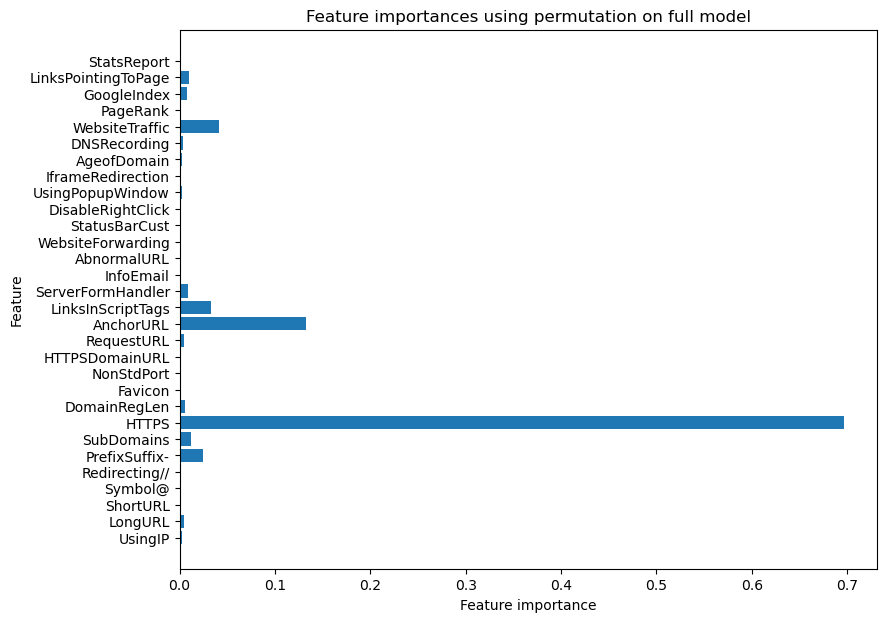

In [69]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()